In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

2021-10-21 05:54:10.277674: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-21 05:54:10.277801: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
dfs = [pd.read_csv('../input/heartbeat/mitbih_train.csv'),pd.read_csv('../input/heartbeat/mitbih_test.csv')]

In [4]:
dfs[1]

,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21886,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21887,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [5]:
for df in dfs:
    df.columns=list(range(len(df.columns)))

In [6]:
train = dfs[0].rename({187: 'Label'}, axis=1)
test = dfs[1].rename({187: 'Label'}, axis=1)


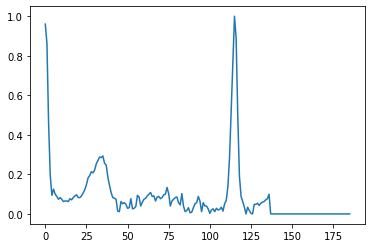

In [7]:
plt.plot(train.iloc[0,:186])

In [8]:
count=train['Label'].value_counts()
print(count)

0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: Label, dtype: int64


In [9]:
count=test['Label'].value_counts()
print(count)

0.0    18117
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: Label, dtype: int64


In [10]:
from sklearn.utils import resample
df_0=train[train['Label']==0]
df_1=train[train['Label']==1]
df_2=train[train['Label']==2]
df_4=train[train['Label']==4]
df_3=(train[train['Label']==3]).sample(n=370,replace=True)
df_0_downsample=resample(df_0,replace=False,n_samples=370,random_state=42)
df_1_downsample=resample(df_1,replace=False,n_samples=370,random_state=42)
df_2_downsample=resample(df_2,replace=False,n_samples=370,random_state=42)
df_4_downsample=resample(df_4,replace=False,n_samples=370,random_state=42)

train=pd.concat([df_0_downsample,df_1_downsample,df_2_downsample,df_3,df_4_downsample])

In [11]:
count=train['Label'].value_counts()
print(count)

0.0    370
1.0    370
2.0    370
3.0    370
4.0    370
Name: Label, dtype: int64


In [12]:
from sklearn.utils import resample
df_0=test[test['Label']==0]
df_1=test[test['Label']==1]
df_2=test[test['Label']==2]
df_4=test[test['Label']==4]
df_3=(test[test['Label']==3]).sample(n=160,replace=True)
df_0_downsample=resample(df_0,replace=False,n_samples=160,random_state=42)
df_1_downsample=resample(df_1,replace=False,n_samples=160,random_state=42)
df_2_downsample=resample(df_2,replace=False,n_samples=160,random_state=42)
df_4_downsample=resample(df_4,replace=False,n_samples=160,random_state=42)

test=pd.concat([df_0_downsample,df_1_downsample,df_2_downsample,df_3,df_4_downsample])

In [13]:
count=test['Label'].value_counts()
print(count)

0.0    160
1.0    160
2.0    160
3.0    160
4.0    160
Name: Label, dtype: int64


In [14]:
x_train=train.drop('Label',axis=1)
y_train=train['Label']
x_train

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
10153,0.923372,0.800766,0.386973,0.000000,0.022989,0.080460,0.141762,0.176245,0.180077,0.183908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33886,1.000000,0.784530,0.198895,0.096685,0.124309,0.157459,0.118785,0.121547,0.116022,0.099448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32005,1.000000,0.844720,0.366460,0.110248,0.166149,0.181677,0.167702,0.180124,0.184783,0.173913,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56158,0.978495,0.723118,0.526882,0.298387,0.220430,0.158602,0.091398,0.091398,0.080645,0.083333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60421,0.868385,0.677069,0.373134,0.111262,0.005427,0.096336,0.143826,0.122117,0.108548,0.107191,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84635,1.000000,0.423977,0.461988,0.356725,0.289474,0.269006,0.315789,0.321637,0.163743,0.108187,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85882,0.903226,0.602151,0.594982,0.559140,0.551971,0.498208,0.487455,0.408602,0.347670,0.193548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81598,0.881890,0.830146,0.766029,0.708661,0.605174,0.503937,0.394826,0.294713,0.250844,0.208099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83637,0.885714,0.534694,0.542857,0.551020,0.555102,0.546939,0.534694,0.489796,0.391837,0.273469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
x_test=test.drop('Label',axis=1)
y_test=test['Label']

In [16]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knnpred = knn.predict(x_test)

In [17]:
def speci(kcm):
    total=sum(sum(kcm))
    sensitivity1 = kcm[0,0]/(kcm[0,0]+kcm[0,1]+kcm[0,2]+kcm[0,3]+kcm[0,4])
    print('Sensitivity of  Non-ecotic beats (normal beat) ', sensitivity1 )
    specificity1 = (kcm[1,1]+kcm[2,2]+kcm[3,3]+kcm[4,4])/(total-(kcm[0,0]+kcm[0,1]+kcm[0,2]+kcm[0,3]+kcm[0,4]))
    print('Specificity of  Non-ecotic beats (normal beat) ', specificity1)
    sensitivity1 = kcm[1,1]/(kcm[1,0]+kcm[1,1]+kcm[1,2]+kcm[1,3]+kcm[1,4])
    print('Sensitivity of  Supraventricular ectopic beats ', sensitivity1 )
    specificity1 = (kcm[0,0]+kcm[2,2]+kcm[3,3]+kcm[4,4])/(total-(kcm[1,0]+kcm[1,1]+kcm[1,2]+kcm[1,3]+kcm[1,4]))
    print('Specificity of  Supraventricular ectopic beats ', specificity1)
    sensitivity1 = kcm[2,2]/(kcm[2,0]+kcm[2,1]+kcm[2,2]+kcm[2,3]+kcm[2,4])
    print('Sensitivity of  Ventricular ectopic beats  ', sensitivity1 )
    specificity1 = (kcm[1,1]+kcm[0,0]+kcm[3,3]+kcm[4,4])/(total-(kcm[2,0]+kcm[2,1]+kcm[2,2]+kcm[2,3]+kcm[2,4]))
    print('Specificity of  Ventricular ectopic beats ', specificity1)
    sensitivity1 = kcm[3,3]/(kcm[3,0]+kcm[3,1]+kcm[3,2]+kcm[3,3]+kcm[3,4])
    print('Sensitivity of  Fusion Beats ', sensitivity1 )
    specificity1 = (kcm[1,1]+kcm[2,2]+kcm[0,0]+kcm[4,4])/(total-(kcm[3,0]+kcm[3,1]+kcm[3,2]+kcm[3,3]+kcm[3,4]))
    print('Specificity of  Fusion Beats ', specificity1)
    sensitivity1 = kcm[4,4]/(kcm[4,0]+kcm[4,1]+kcm[4,2]+kcm[4,3]+kcm[4,4])
    print('Sensitivity of  Unknown Beats ', sensitivity1 )
    specificity1 = (kcm[1,1]+kcm[2,2]+kcm[3,3]+kcm[0,0])/(total-(kcm[4,0]+kcm[4,1]+kcm[4,2]+kcm[4,3]+kcm[4,4]))
    print('Specificity of  Unknown Beats ', specificity1)
    

In [18]:
kcm = metrics.confusion_matrix(y_test, knnpred)
print(kcm)
print(metrics.classification_report(y_test, knnpred))
knnaccuracy = metrics.accuracy_score(y_test, knnpred)
print("Accuracy of KNN:",knnaccuracy)
speci(kcm)

[[118  10  14  17   1]
 [ 24 113   8  11   4]
 [ 14  10 127   8   1]
 [  8   0   5 147   0]
 [  2   1   6   1 150]]
              precision    recall  f1-score   support

         0.0       0.71      0.74      0.72       160
         1.0       0.84      0.71      0.77       160
         2.0       0.79      0.79      0.79       160
         3.0       0.80      0.92      0.85       160
         4.0       0.96      0.94      0.95       160

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800

Accuracy of KNN: 0.81875
Sensitivity of  Non-ecotic beats (normal beat)  0.7375
Specificity of  Non-ecotic beats (normal beat)  0.8390625
Sensitivity of  Supraventricular ectopic beats  0.70625
Specificity of  Supraventricular ectopic beats  0.846875
Sensitivity of  Ventricular ectopic beats   0.79375
Specificity of  Ventricular ectopic beats  0.825
Sensitivity of  Fusion Beats  0.91875
Speci

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
nbpred = gnb.predict(x_test)

In [20]:
from sklearn import metrics
nbconfusion = metrics.confusion_matrix(y_test, nbpred)
print(nbconfusion)
print(metrics.classification_report(y_test, nbpred))
speci(nbconfusion)

[[ 15   0   6   1 138]
 [ 24  22   6   1 107]
 [ 14   0  38   1 107]
 [  0   0   0   0 160]
 [  0   0   0   0 160]]
              precision    recall  f1-score   support

         0.0       0.28      0.09      0.14       160
         1.0       1.00      0.14      0.24       160
         2.0       0.76      0.24      0.36       160
         3.0       0.00      0.00      0.00       160
         4.0       0.24      1.00      0.38       160

    accuracy                           0.29       800
   macro avg       0.46      0.29      0.23       800
weighted avg       0.46      0.29      0.23       800

Sensitivity of  Non-ecotic beats (normal beat)  0.09375
Specificity of  Non-ecotic beats (normal beat)  0.34375
Sensitivity of  Supraventricular ectopic beats  0.1375
Specificity of  Supraventricular ectopic beats  0.3328125
Sensitivity of  Ventricular ectopic beats   0.2375
Specificity of  Ventricular ectopic beats  0.3078125
Sensitivity of  Fusion Beats  0.0
Specificity of  Fusion Beats  0.

In [21]:
nbaccuracy = metrics.accuracy_score(y_test, nbpred)
print("Accuracy of NaiveBayes:",nbaccuracy)

Accuracy of NaiveBayes: 0.29375


In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(x_train, y_train)
rfcpred = rfc.predict(x_test)

In [23]:
rfcconfusion = metrics.confusion_matrix(y_test, rfcpred)
print(rfcconfusion)

[[130  11   6  11   2]
 [ 38 114   4   4   0]
 [ 10   3 140   6   1]
 [  7   0   5 148   0]
 [  3   0   3   0 154]]


In [24]:
print(metrics.classification_report(y_test, rfcpred))
speci(rfcconfusion)

              precision    recall  f1-score   support

         0.0       0.69      0.81      0.75       160
         1.0       0.89      0.71      0.79       160
         2.0       0.89      0.88      0.88       160
         3.0       0.88      0.93      0.90       160
         4.0       0.98      0.96      0.97       160

    accuracy                           0.86       800
   macro avg       0.86      0.86      0.86       800
weighted avg       0.86      0.86      0.86       800

Sensitivity of  Non-ecotic beats (normal beat)  0.8125
Specificity of  Non-ecotic beats (normal beat)  0.86875
Sensitivity of  Supraventricular ectopic beats  0.7125
Specificity of  Supraventricular ectopic beats  0.89375
Sensitivity of  Ventricular ectopic beats   0.875
Specificity of  Ventricular ectopic beats  0.853125
Sensitivity of  Fusion Beats  0.925
Specificity of  Fusion Beats  0.840625
Sensitivity of  Unknown Beats  0.9625
Specificity of  Unknown Beats  0.83125


In [25]:
rfcaccuracy = metrics.accuracy_score(y_test, rfcpred)
print("Accuracy of Randomforest:",rfcaccuracy)

Accuracy of Randomforest: 0.8575


In [26]:
from sklearn.svm import SVC  
svm = SVC()
svm.fit(x_train, y_train)
svmpred = svm.predict(x_test)

In [27]:
svmconfusion = metrics.confusion_matrix(y_test, svmpred)
print(svmconfusion)
speci(svmconfusion)

[[131   6   8  14   1]
 [ 52  95   5   6   2]
 [ 12   0 141   6   1]
 [  8   0   3 149   0]
 [ 12   0   3   1 144]]
Sensitivity of  Non-ecotic beats (normal beat)  0.81875
Specificity of  Non-ecotic beats (normal beat)  0.8265625
Sensitivity of  Supraventricular ectopic beats  0.59375
Specificity of  Supraventricular ectopic beats  0.8828125
Sensitivity of  Ventricular ectopic beats   0.88125
Specificity of  Ventricular ectopic beats  0.8109375
Sensitivity of  Fusion Beats  0.93125
Specificity of  Fusion Beats  0.7984375
Sensitivity of  Unknown Beats  0.9
Specificity of  Unknown Beats  0.80625


In [28]:
print(metrics.classification_report(y_test, svmpred))

              precision    recall  f1-score   support

         0.0       0.61      0.82      0.70       160
         1.0       0.94      0.59      0.73       160
         2.0       0.88      0.88      0.88       160
         3.0       0.85      0.93      0.89       160
         4.0       0.97      0.90      0.94       160

    accuracy                           0.82       800
   macro avg       0.85      0.82      0.83       800
weighted avg       0.85      0.82      0.83       800



In [29]:
svmaccuracy = metrics.accuracy_score(y_test, svmpred)
print("Accuracy of SVM:",svmaccuracy)

Accuracy of SVM: 0.825


In [30]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(x_train, y_train)
svmpolypred = svclassifier.predict(x_test)

In [31]:
svmpolyconfusion = metrics.confusion_matrix(y_test, svmpolypred)
print(svmpolyconfusion)
speci(svmpolyconfusion)

[[ 96   7  11  44   2]
 [ 25  85  10  39   1]
 [ 18   3 120  17   2]
 [  3   0   3 154   0]
 [ 13   0   4   2 141]]
Sensitivity of  Non-ecotic beats (normal beat)  0.6
Specificity of  Non-ecotic beats (normal beat)  0.78125
Sensitivity of  Supraventricular ectopic beats  0.53125
Specificity of  Supraventricular ectopic beats  0.7984375
Sensitivity of  Ventricular ectopic beats   0.75
Specificity of  Ventricular ectopic beats  0.74375
Sensitivity of  Fusion Beats  0.9625
Specificity of  Fusion Beats  0.690625
Sensitivity of  Unknown Beats  0.88125
Specificity of  Unknown Beats  0.7109375


In [32]:
print(metrics.classification_report(y_test, svmpolypred))

              precision    recall  f1-score   support

         0.0       0.62      0.60      0.61       160
         1.0       0.89      0.53      0.67       160
         2.0       0.81      0.75      0.78       160
         3.0       0.60      0.96      0.74       160
         4.0       0.97      0.88      0.92       160

    accuracy                           0.74       800
   macro avg       0.78      0.74      0.74       800
weighted avg       0.78      0.74      0.74       800



In [33]:
svmpolyaccuracy = metrics.accuracy_score(y_test, svmpolypred)
print("Accuracy of SVM:",svmpolyaccuracy)

Accuracy of SVM: 0.745


In [34]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train, y_train)
svmrbfpred = svclassifier.predict(x_test)

In [35]:
svmrbfconfusion = metrics.confusion_matrix(y_test, svmrbfpred)
print(svmrbfconfusion)
speci(svmrbfconfusion)

[[131   6   8  14   1]
 [ 52  95   5   6   2]
 [ 12   0 141   6   1]
 [  8   0   3 149   0]
 [ 12   0   3   1 144]]
Sensitivity of  Non-ecotic beats (normal beat)  0.81875
Specificity of  Non-ecotic beats (normal beat)  0.8265625
Sensitivity of  Supraventricular ectopic beats  0.59375
Specificity of  Supraventricular ectopic beats  0.8828125
Sensitivity of  Ventricular ectopic beats   0.88125
Specificity of  Ventricular ectopic beats  0.8109375
Sensitivity of  Fusion Beats  0.93125
Specificity of  Fusion Beats  0.7984375
Sensitivity of  Unknown Beats  0.9
Specificity of  Unknown Beats  0.80625


In [36]:
print(metrics.classification_report(y_test, svmrbfpred))

              precision    recall  f1-score   support

         0.0       0.61      0.82      0.70       160
         1.0       0.94      0.59      0.73       160
         2.0       0.88      0.88      0.88       160
         3.0       0.85      0.93      0.89       160
         4.0       0.97      0.90      0.94       160

    accuracy                           0.82       800
   macro avg       0.85      0.82      0.83       800
weighted avg       0.85      0.82      0.83       800



In [37]:
svmrbfaccuracy = metrics.accuracy_score(y_test, svmrbfpred)
print("Accuracy of SVM:",svmrbfaccuracy)

Accuracy of SVM: 0.825


In [38]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(x_train, y_train)
svmsigpred = svclassifier.predict(x_test)

In [39]:
svmsigconfusion = metrics.confusion_matrix(y_test, svmsigpred)
print(svmsigconfusion)
speci(svmsigconfusion)

[[ 71   7  73   5   4]
 [ 92  16  49   3   0]
 [ 63   7  73  10   7]
 [ 19   0  41 100   0]
 [109   0  33   0  18]]
Sensitivity of  Non-ecotic beats (normal beat)  0.44375
Specificity of  Non-ecotic beats (normal beat)  0.3234375
Sensitivity of  Supraventricular ectopic beats  0.1
Specificity of  Supraventricular ectopic beats  0.409375
Sensitivity of  Ventricular ectopic beats   0.45625
Specificity of  Ventricular ectopic beats  0.3203125
Sensitivity of  Fusion Beats  0.625
Specificity of  Fusion Beats  0.278125
Sensitivity of  Unknown Beats  0.1125
Specificity of  Unknown Beats  0.40625


In [40]:
print(metrics.classification_report(y_test, svmsigpred))

              precision    recall  f1-score   support

         0.0       0.20      0.44      0.28       160
         1.0       0.53      0.10      0.17       160
         2.0       0.27      0.46      0.34       160
         3.0       0.85      0.62      0.72       160
         4.0       0.62      0.11      0.19       160

    accuracy                           0.35       800
   macro avg       0.49      0.35      0.34       800
weighted avg       0.49      0.35      0.34       800



In [41]:
svmsigaccuracy = metrics.accuracy_score(y_test, svmsigpred)
print("Accuracy of SVM:",svmsigaccuracy)

Accuracy of SVM: 0.3475


In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dtpred = dt.predict(x_test)

In [43]:
dtconfusion = metrics.confusion_matrix(y_test, dtpred)
print(dtconfusion)
speci(dtconfusion)

[[111  16   9  19   5]
 [ 30 112   8   7   3]
 [ 12   7 130   7   4]
 [ 20   3  16 121   0]
 [  8   0   8   0 144]]
Sensitivity of  Non-ecotic beats (normal beat)  0.69375
Specificity of  Non-ecotic beats (normal beat)  0.7921875
Sensitivity of  Supraventricular ectopic beats  0.7
Specificity of  Supraventricular ectopic beats  0.790625
Sensitivity of  Ventricular ectopic beats   0.8125
Specificity of  Ventricular ectopic beats  0.7625
Sensitivity of  Fusion Beats  0.75625
Specificity of  Fusion Beats  0.7765625
Sensitivity of  Unknown Beats  0.9
Specificity of  Unknown Beats  0.740625


In [44]:
print(metrics.classification_report(y_test, dtpred))

              precision    recall  f1-score   support

         0.0       0.61      0.69      0.65       160
         1.0       0.81      0.70      0.75       160
         2.0       0.76      0.81      0.79       160
         3.0       0.79      0.76      0.77       160
         4.0       0.92      0.90      0.91       160

    accuracy                           0.77       800
   macro avg       0.78      0.77      0.77       800
weighted avg       0.78      0.77      0.77       800



In [45]:
dtaccuracy = metrics.accuracy_score(y_test, dtpred)
print("Accuracy of decision tree:",dtaccuracy)

Accuracy of decision tree: 0.7725
